In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Read and analysis the data

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/glass.csv')
data

,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.00.1,1
0,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.00,1
1,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.00,1
2,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.00,1
3,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.00,1
4,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.00,0.26,1
...,...,...,...,...,...,...,...,...,...,...
208,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.00,7
209,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.00,7
210,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.00,7
211,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.00,7


In [3]:
data.rename(columns={'1.52101':'refractive index',\
                    '13.64':'Sodium ',\
                    '4.49':'Magnesium',\
                    '1.10':'Aluminum',\
                    '71.78':'Silicon',\
                    '0.06':'Potassium',\
                    '8.75':'Calcium',\
                    '0.00':'Barium',\
                    '0.00.1':'Iron',\
                    '1':'Type of glass'},\
           inplace=True)

In [4]:
data.shape

(213, 10)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213 entries, 0 to 212
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   refractive index  213 non-null    float64
 1   Sodium            213 non-null    float64
 2   Magnesium         213 non-null    float64
 3   Aluminum          213 non-null    float64
 4   Silicon           213 non-null    float64
 5   Potassium         213 non-null    float64
 6   Calcium           213 non-null    float64
 7   Barium            213 non-null    float64
 8   Iron              213 non-null    float64
 9   Type of glass     213 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [6]:
data.isnull().sum()

refractive index    0
Sodium              0
Magnesium           0
Aluminum            0
Silicon             0
Potassium           0
Calcium             0
Barium              0
Iron                0
Type of glass       0
dtype: int64

In [7]:
data.isna().count()

refractive index    213
Sodium              213
Magnesium           213
Aluminum            213
Silicon             213
Potassium           213
Calcium             213
Barium              213
Iron                213
Type of glass       213
dtype: int64

In [8]:
data.columns

Index(['refractive index', 'Sodium ', 'Magnesium', 'Aluminum', 'Silicon',
       'Potassium', 'Calcium', 'Barium', 'Iron', 'Type of glass'],
      dtype='object')

# Data analysis

In [9]:
data.describe()

,refractive index,Sodium,Magnesium,Aluminum,Silicon,Potassium,Calcium,Barium,Iron,Type of glass
count,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000
mean,1.518353,13.406761,2.676056,1.446526,72.655023,0.499108,8.957934,0.175869,0.057277,2.788732
std,0.003039,0.818371,1.440453,0.499882,0.774052,0.653035,1.426435,0.498245,0.097589,2.105130
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516520,12.900000,2.090000,1.190000,72.280000,0.130000,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.560000,8.600000,0.000000,0.000000,2.000000
75%,1.519150,13.830000,3.600000,1.630000,73.090000,0.610000,9.180000,0.000000,0.100000,3.000000
max,1.533930,17.380000,3.980000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [10]:
for i in data.columns:
    print(data[i].value_counts())
    print('\n')

1.52152    3
1.51590    3
1.51645    3
1.51761    2
1.51613    2
          ..
1.51625    1
1.51569    1
1.51605    1
1.51588    1
1.51651    1
Name: refractive index, Length: 177, dtype: int64


13.21    5
13.02    5
13.00    5
12.85    4
12.86    4
        ..
13.34    1
13.31    1
14.17    1
13.51    1
14.23    1
Name: Sodium , Length: 142, dtype: int64


0.00    42
3.48     8
3.58     8
3.54     8
3.52     7
        ..
3.46     1
3.73     1
3.97     1
3.89     1
1.78     1
Name: Magnesium, Length: 93, dtype: int64


1.54    8
1.19    6
1.56    5
1.29    5
1.43    5
       ..
1.61    1
0.88    1
1.05    1
0.65    1
1.94    1
Name: Aluminum, Length: 117, dtype: int64


72.99    4
73.10    4
72.86    4
73.28    4
73.11    4
        ..
70.57    1
73.81    1
72.92    1
73.55    1
73.61    1
Name: Silicon, Length: 132, dtype: int64


0.00    30
0.57    12
0.56    11
0.60    11
0.58    10
        ..
0.44     1
0.07     1
0.73     1
0.70     1
1.41     1
Name: Potassium, Length: 65, dtype: i

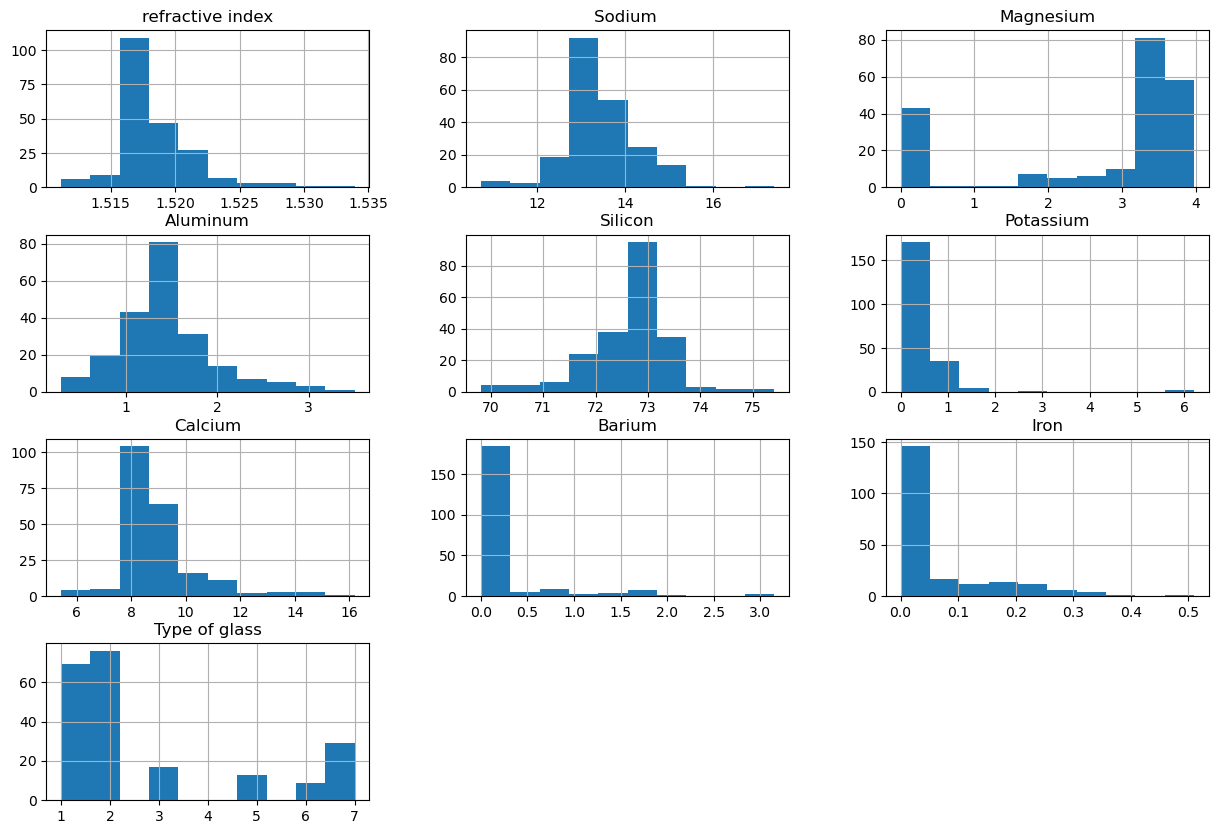

In [11]:
data.hist(figsize=(15,10))
plt.show()

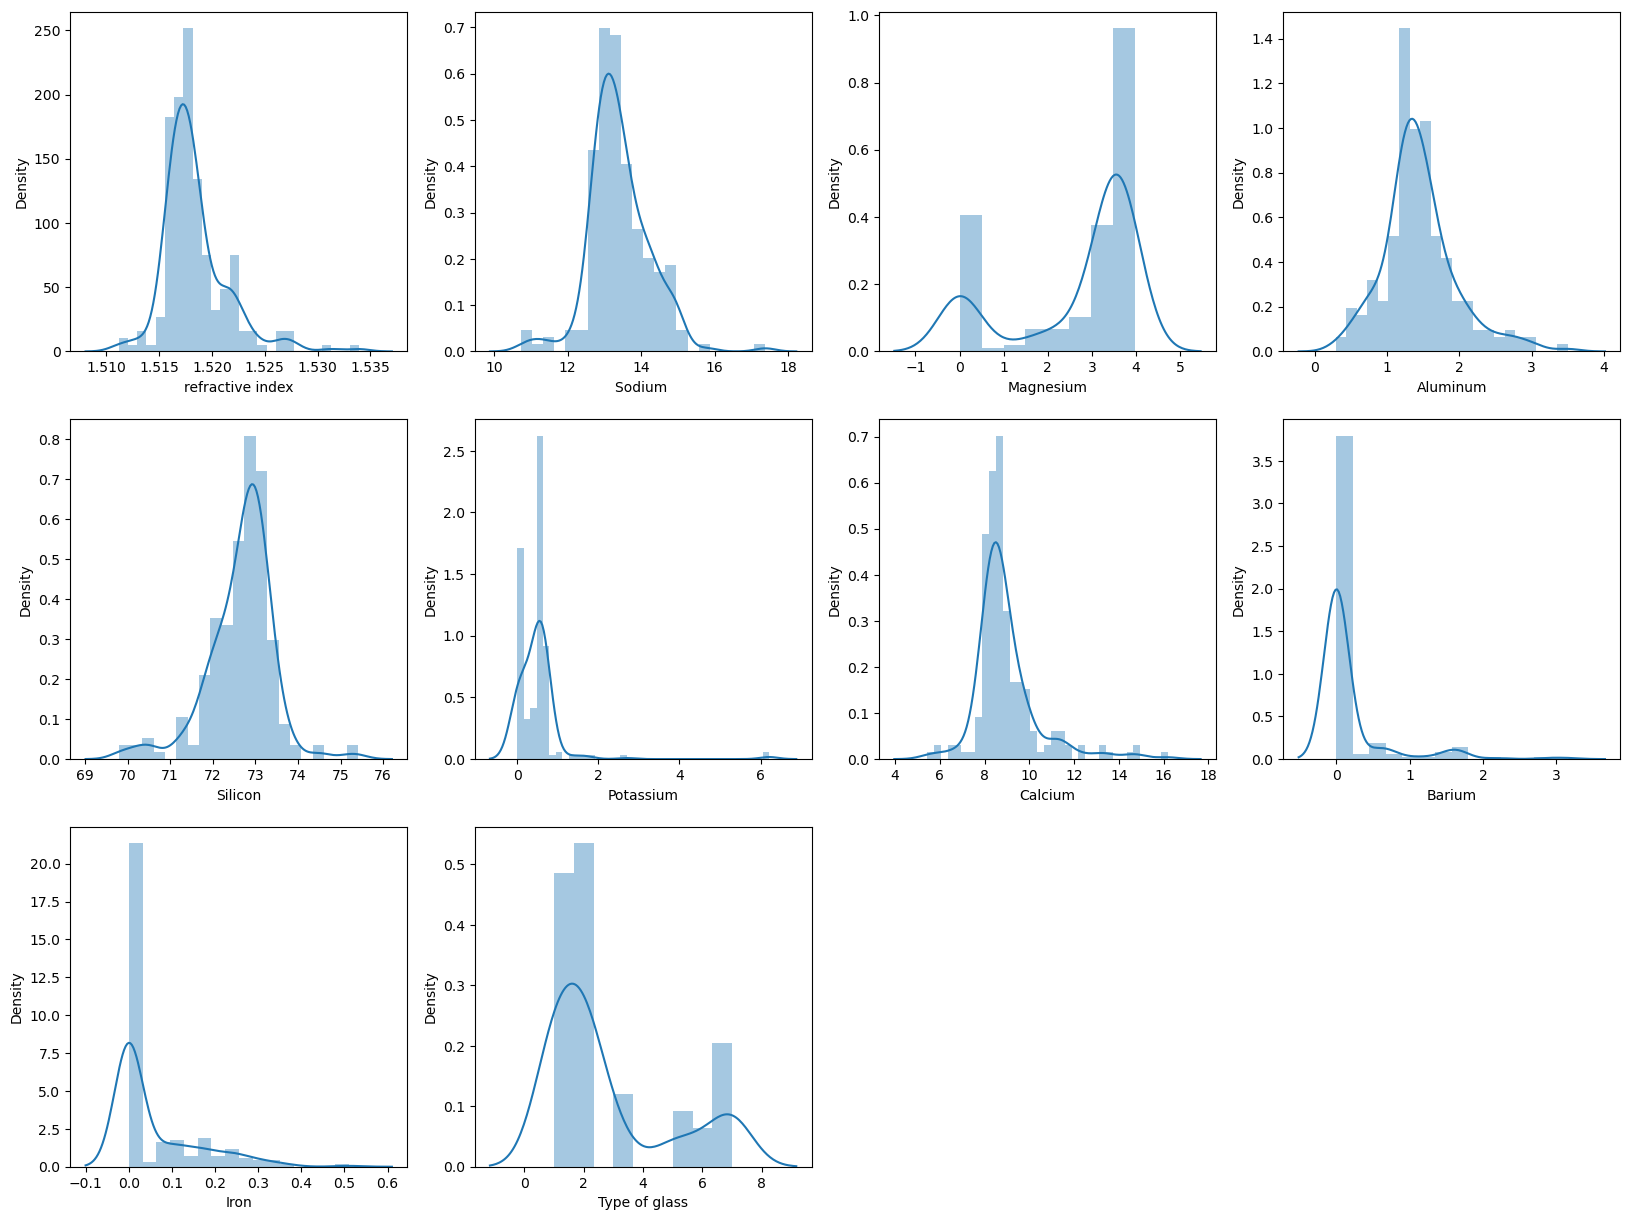

In [12]:
plt.figure(figsize=(20,15), facecolor='white')
plotnumber = 1

for column in data:
    if plotnumber<=10:
        ax=plt.subplot(3,4,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column, fontsize=10)
    plotnumber+=1
plt.show()

# check the skewness

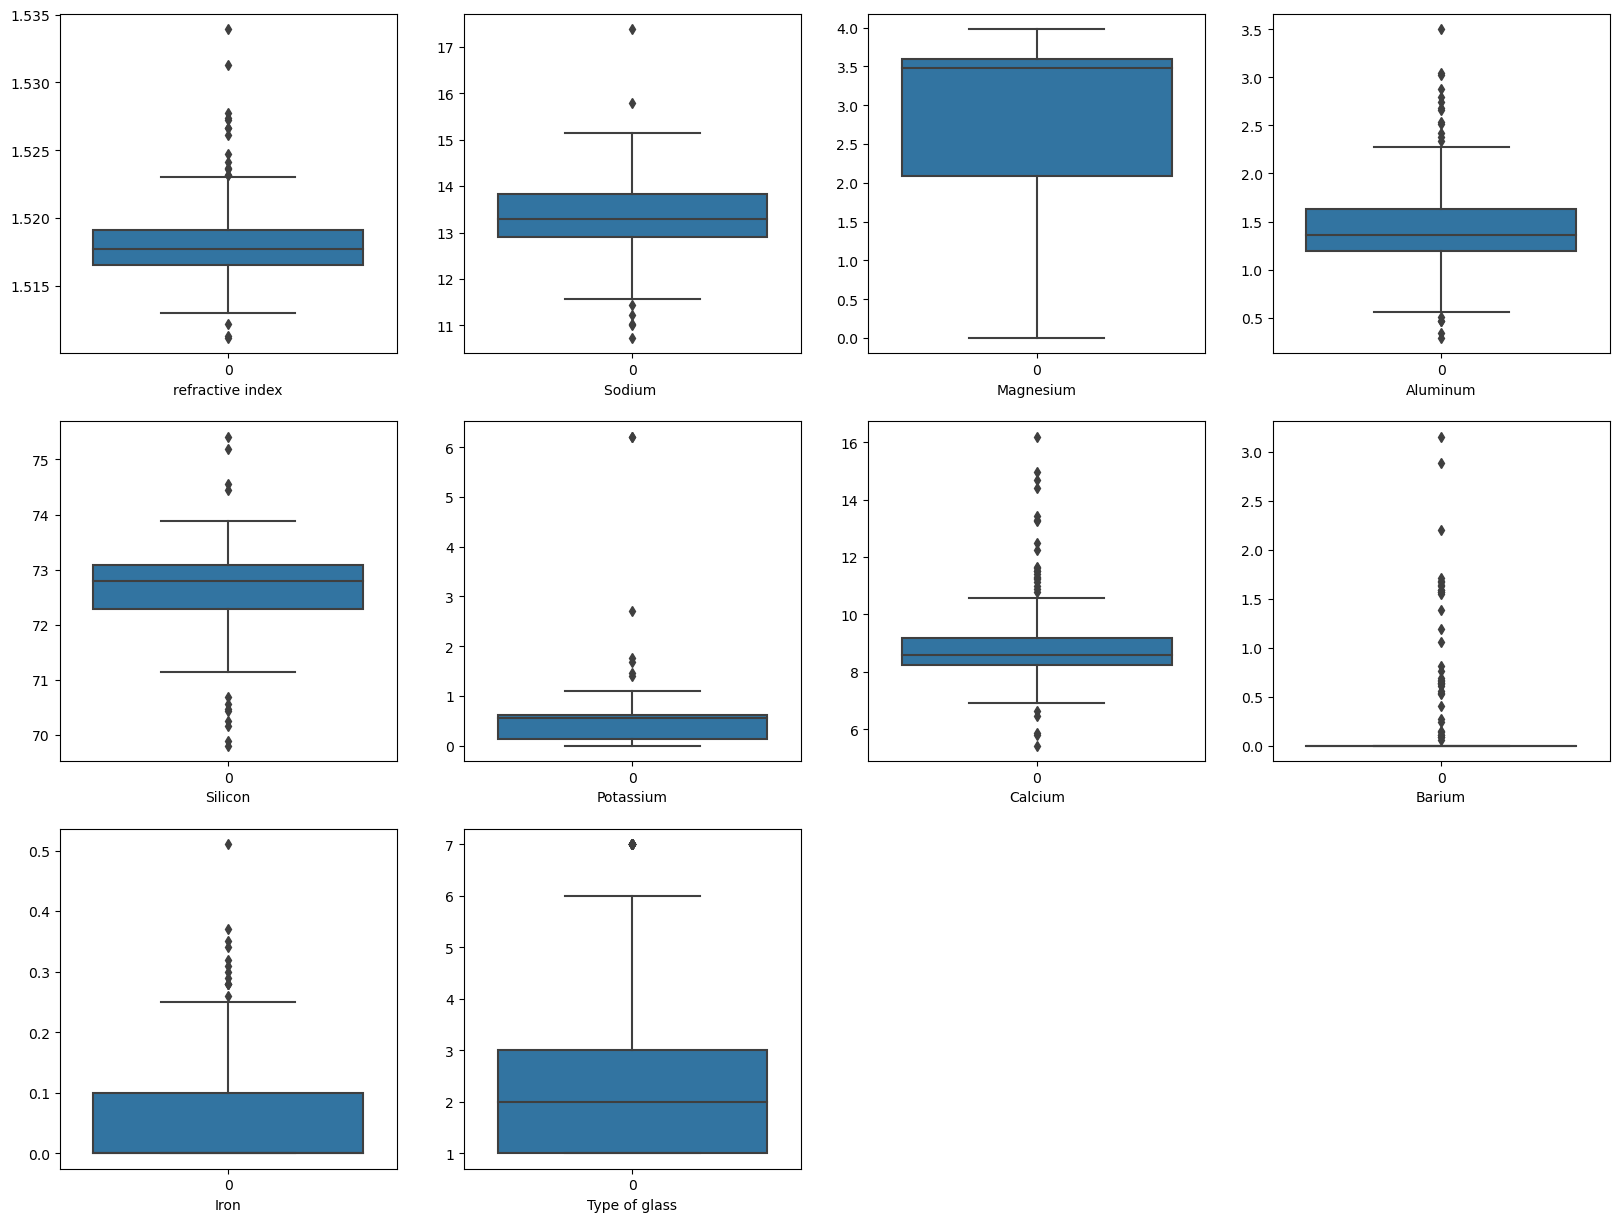

In [13]:
plt.figure(figsize=(20,15), facecolor='white')
plotnumber = 1

for column in data:
    if plotnumber<=10:
        ax=plt.subplot(3,4,plotnumber)
        sns.boxplot(data[column])
        plt.xlabel(column, fontsize=10)
    plotnumber+=1
plt.show()

# check the correlation using heatmap

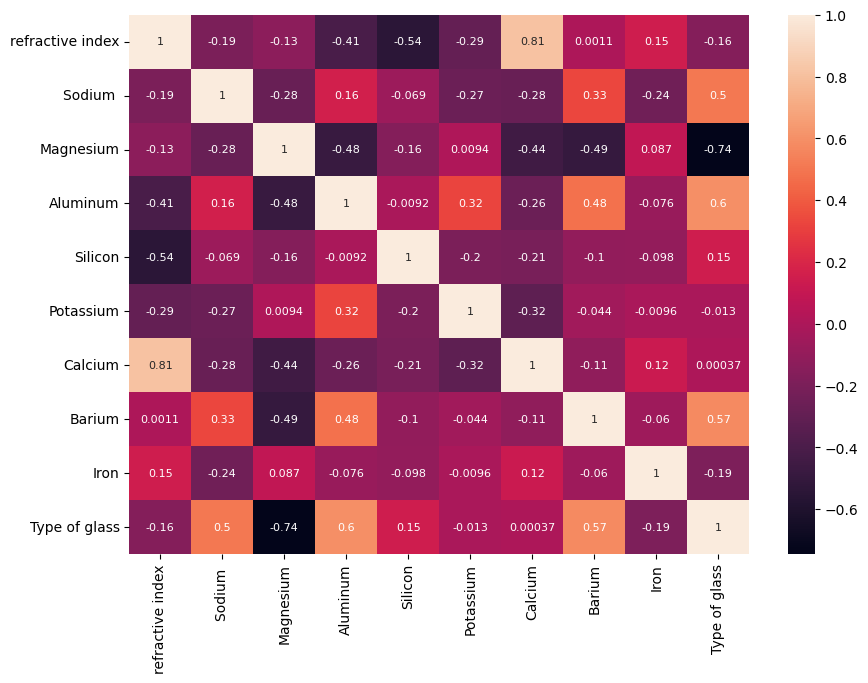

In [14]:
plt.figure(figsize=(10,7))
sns.heatmap(data.corr(),annot=True, annot_kws={'size':8})
plt.show()

In [15]:
data.skew()

refractive index    1.639658
Sodium              0.457318
Magnesium          -1.154323
Aluminum            0.900017
Silicon            -0.744546
Potassium           6.549276
Calcium             2.040591
Barium              3.406749
Iron                1.747173
Type of glass       1.108861
dtype: float64

# remove the skewness

In [16]:
data["refractive index"]=np.sqrt(data["refractive index"])
data["Silicon"]=np.sqrt(data["Silicon"])
data["Potassium"]=np.sqrt(data["Potassium"])
data["Calcium"]=np.sqrt(data["Calcium"])
data["Barium"]=np.sqrt(data["Barium"])
data["Iron"]=np.sqrt(data["Iron"])

In [17]:
data.skew()

refractive index    1.633370
Sodium              0.457318
Magnesium          -1.154323
Aluminum            0.900017
Silicon            -0.779642
Potassium           0.865823
Calcium             1.566901
Barium              2.369065
Iron                1.046027
Type of glass       1.108861
dtype: float64

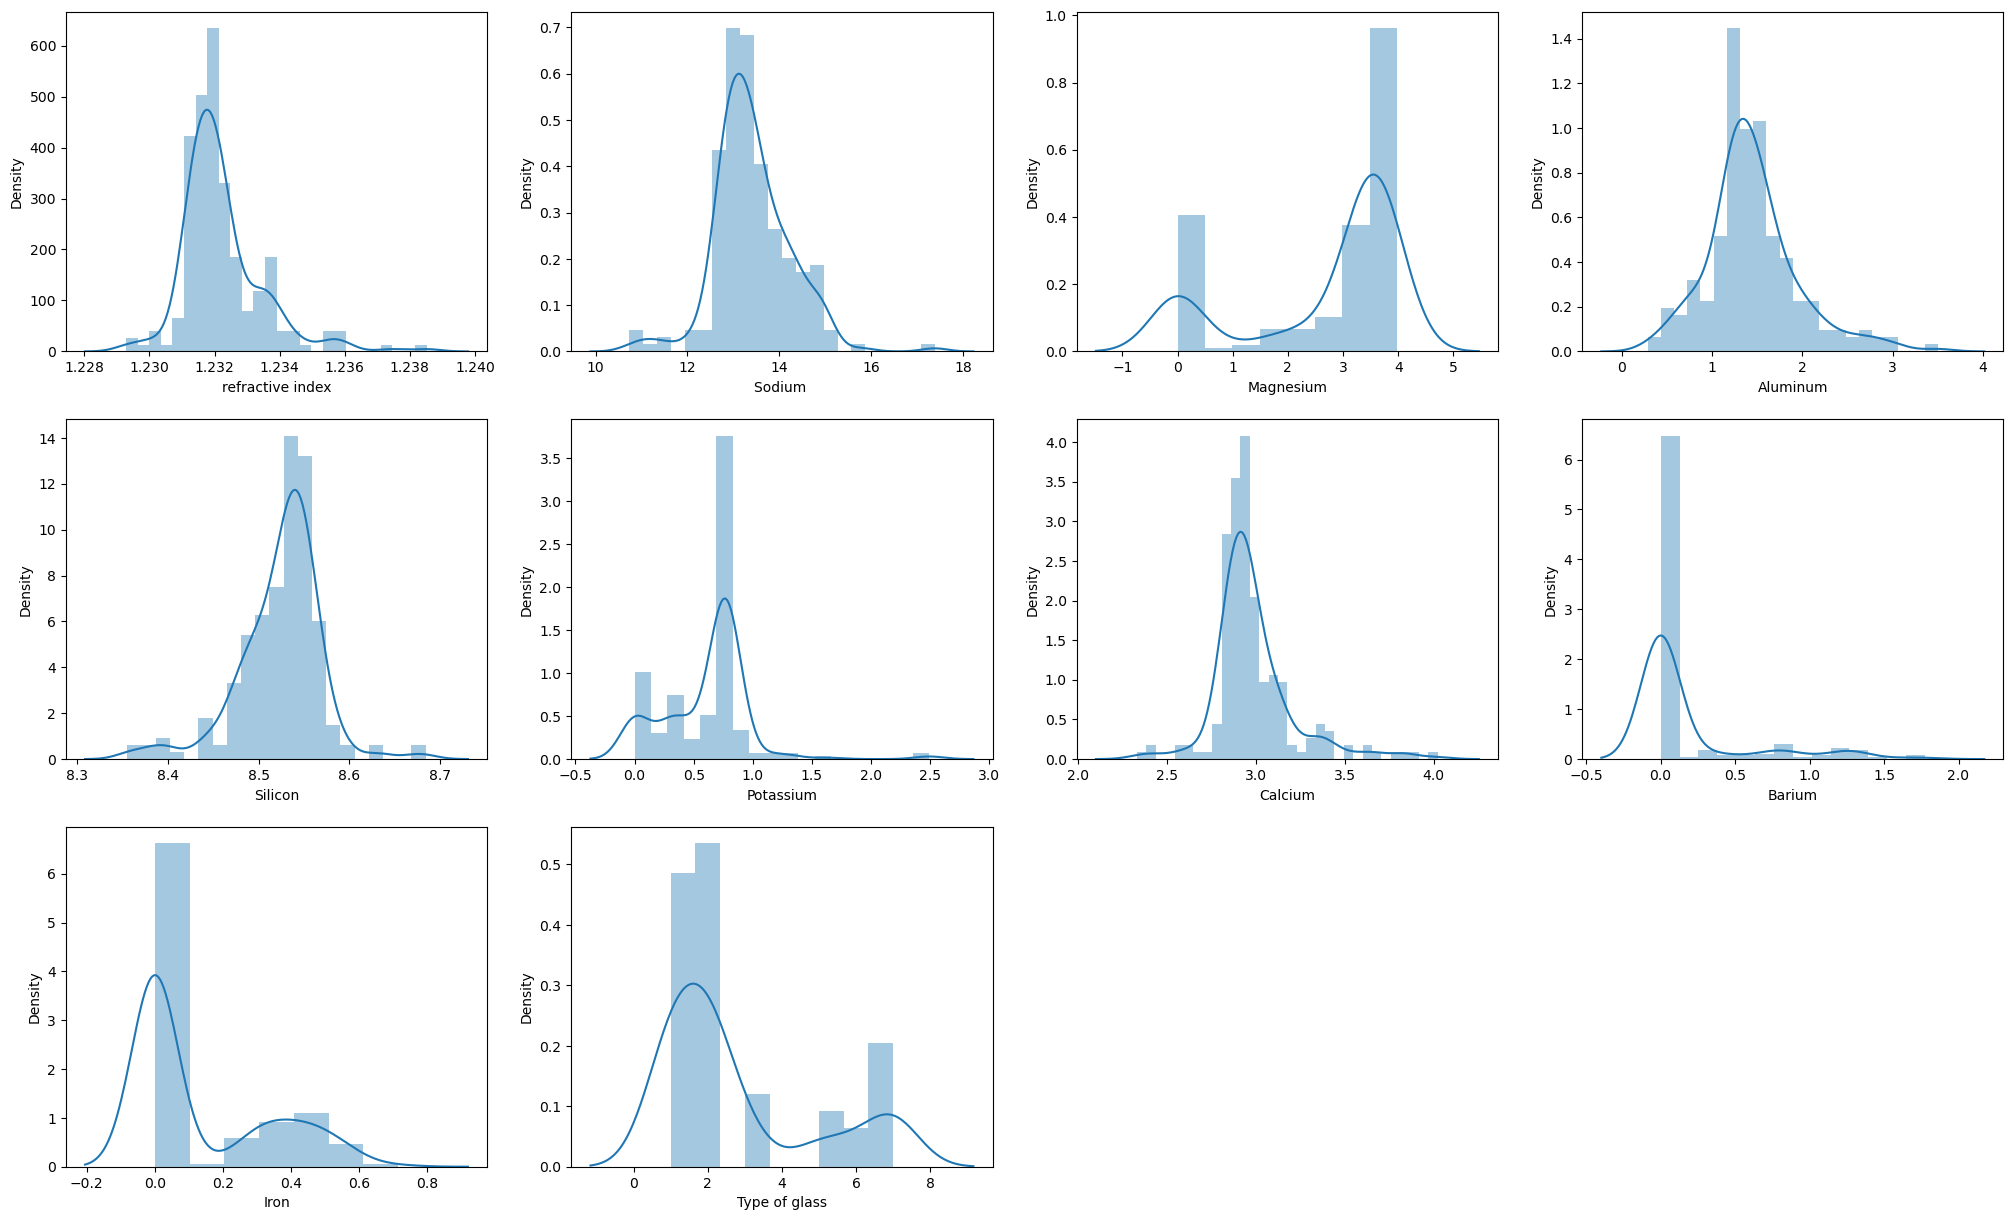

In [18]:
plt.figure(figsize=(25,15), facecolor="white")
plotnumber = 1


for column in data:
    if plotnumber<=10:
        ax=plt.subplot(3,4,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column, fontsize=10)
    plotnumber+=1
plt.show()

# make multiclass classification data to binary class calssification data

In [19]:
data['Type of glass'].unique()

array([1, 2, 3, 5, 6, 7], dtype=int64)

In [20]:
data['Type of glass']=[1 if x>=4 else 0 for x in data['Type of glass']]

In [21]:
data['Type of glass'].unique()

array([0, 1], dtype=int64)

In [22]:
data['Type of glass'].value_counts()

0    162
1     51
Name: Type of glass, dtype: int64

# split the target and features  

In [23]:
X=data.drop("Type of glass", axis=True)
Y=data["Type of glass"]

In [24]:
X

,refractive index,Sodium,Magnesium,Aluminum,Silicon,Potassium,Calcium,Barium,Iron
0,1.231913,13.89,3.60,1.36,8.528189,0.692820,2.798214,0.000000,0.000000
1,1.231333,13.53,3.55,1.54,8.543419,0.624500,2.789265,0.000000,0.000000
2,1.231933,13.21,3.69,1.29,8.521150,0.754983,2.867054,0.000000,0.000000
3,1.231836,13.27,3.62,1.24,8.548684,0.741620,2.840775,0.000000,0.000000
4,1.231243,12.79,3.61,1.62,8.542248,0.800000,2.840775,0.000000,0.509902
...,...,...,...,...,...,...,...,...,...
208,1.231353,14.14,0.00,2.88,8.521150,0.282843,3.029851,1.029563,0.000000
209,1.231605,14.92,0.00,1.99,8.547514,0.000000,2.898275,1.260952,0.000000
210,1.233146,14.36,0.00,2.02,8.568547,0.000000,2.905168,1.280625,0.000000
211,1.231467,14.38,0.00,1.94,8.579627,0.000000,2.912044,1.252996,0.000000


In [25]:
Y

0      0
1      0
2      0
3      0
4      0
      ..
208    1
209    1
210    1
211    1
212    1
Name: Type of glass, Length: 213, dtype: int64

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import GridSearchCV

# Splitting training and testing the data 

In [27]:
scaler = StandardScaler()
X_scaler = scaler.fit_transform(X)

In [28]:
x_train, x_test, y_train, y_test = train_test_split(X_scaler,Y,test_size=0.25,random_state=355)

In [29]:
def metric_score(clf,x_train,x_test,y_train,y_test,train=True):
    if train:
        y_pred = clf.predict(x_train)
        print("\n================== Train Result===================")
        
        print(f"accuracy score :{accuracy_score(y_train,y_pred) * 100:.2f}%")
        
    elif train==False:
        pred = clf.predict(x_test)
        
        print("\n===================Test Result======================")
        
        print(f"accuracy score :{accuracy_score(y_test,pred) * 100:.2f}%")
        
        print('\n \n Test Classification Report \n', classification_report(y_test, pred,digits=2))

# knn model training 

In [30]:
knn = KNeighborsClassifier()

knn.fit(x_train,y_train)

KNeighborsClassifier()

# predict the model

In [31]:
metric_score(knn,x_train,x_test,y_train,y_test,train=True)

metric_score(knn,x_train,x_test,y_train,y_test,train=False)


================== Train Result===================
accuracy score :93.71%

===================Test Result======================
accuracy score :88.89%

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.89      0.98      0.93        41
           1       0.89      0.62      0.73        13

    accuracy                           0.89        54
   macro avg       0.89      0.80      0.83        54
weighted avg       0.89      0.89      0.88        54



# hyperparameter tuning train the model

In [32]:
param_grid = {'algorithm': ['kd_tree','brute'],
             'leaf_size' : [3,5,6,7,8],
             'n_neighbors' :[3,5,7,9,11,13]}

In [33]:
gridsearch = GridSearchCV(estimator=knn, param_grid=param_grid)

In [34]:
gridsearch.fit(x_train,y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['kd_tree', 'brute'],
                         'leaf_size': [3, 5, 6, 7, 8],
                         'n_neighbors': [3, 5, 7, 9, 11, 13]})

In [35]:
gridsearch.best_score_

0.9304435483870968

# predict the model

In [36]:
gridsearch.best_estimator_

KNeighborsClassifier(algorithm='kd_tree', leaf_size=3, n_neighbors=3)

In [37]:
knn = KNeighborsClassifier(algorithm = 'kd_tree', leaf_size =3, n_neighbors=3)
knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='kd_tree', leaf_size=3, n_neighbors=3)

In [38]:
metric_score(knn,x_train,x_test,y_train,y_test,train=True)
metric_score(knn,x_train,x_test,y_train,y_test,train=False)


================== Train Result===================
accuracy score :97.48%

===================Test Result======================
accuracy score :92.59%

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.93      0.98      0.95        41
           1       0.91      0.77      0.83        13

    accuracy                           0.93        54
   macro avg       0.92      0.87      0.89        54
weighted avg       0.93      0.93      0.92        54



# decision tree train the model

In [39]:
from sklearn.tree import DecisionTreeClassifier

In [40]:
clf = DecisionTreeClassifier()
clf.fit(x_train,y_train)

DecisionTreeClassifier()

# predict the model

In [42]:
metric_score(clf,x_train,x_test,y_train,y_test,train=True)
metric_score(clf,x_train,x_test,y_train,y_test,train=False)


================== Train Result===================
accuracy score :100.00%

===================Test Result======================
accuracy score :94.44%

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.97      0.95      0.96        41
           1       0.86      0.92      0.89        13

    accuracy                           0.94        54
   macro avg       0.92      0.94      0.93        54
weighted avg       0.95      0.94      0.95        54



# random forest classifier train the data

In [44]:
from sklearn.ensemble import RandomForestClassifier

In [46]:
random_clf = RandomForestClassifier()

random_clf.fit(x_train,y_train)

RandomForestClassifier()

# predict the model

In [48]:
metric_score(random_clf,x_train,x_test,y_train,y_test, train=True)
metric_score(random_clf,x_train,x_test,y_train,y_test, train=False)


================== Train Result===================
accuracy score :100.00%

===================Test Result======================
accuracy score :88.89%

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.93      0.93      0.93        41
           1       0.77      0.77      0.77        13

    accuracy                           0.89        54
   macro avg       0.85      0.85      0.85        54
weighted avg       0.89      0.89      0.89        54

